In [1]:
# pip install mlxtend

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, LSTM, Embedding, Activation, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras import metrics

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import random

In [48]:
# load the dataset
def load_dataset(filename):
    df = pd.read_csv(filename)
    
    y = df['Category'] # y: 'Category' column
    y = np.array(y)
    
    x = df['Message'] #x: 'Message' column
    x = np.array(x)
    
    return df, x, y

In [49]:
df, x, y = load_dataset('SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Load data & Pre-processing the raw data

In [50]:
# check NAs
df.isna().sum()

Category    0
Message     0
dtype: int64

In [51]:
# convert string in "Category" column to numerical binary encoding
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

def label_encoder(data):
    le = preprocessing.LabelEncoder()
    le.fit(data) # first fit lable encoder
    enc = le.transform(data) # then transform labels to normalized encoding
    return enc

df['Category'] = label_encoder(df['Category'])

In [52]:
# df.head()
# y = df['Category']
# x = df['Message']

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
# convert x to iterable object for vectorization
x = list(x)
# x[:5]
tfidfvectorizer = TfidfVectorizer(stop_words='english', use_idf=True)
x = tfidfvectorizer.fit_transform(x)
x = x.toarray()

In [58]:
print(x.shape)
print(y.shape)

(5572, 8440)
(5572,)


In [59]:
# split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# check the split results
print(len(y_train))
print(len(y_test))

## Build the model

In [61]:
input_dim = x_train.shape[1]
batch_size = 100

In [63]:
# first simple sequential model
model_1=tf.keras.Sequential()
model_1.add(Dense(16, input_dim=input_dim, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [64]:
model_1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                135056    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 135,073
Trainable params: 135,073
Non-trainable params: 0
_________________________________________________________________


In [65]:
history_11 = model_1.fit(x_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size)

Epoch 1/10
39/39 [==============================] - 1s 14ms/step - loss: 0.6450 - accuracy: 0.8623 - val_loss: 0.5881 - val_accuracy: 0.8822
Epoch 2/10
39/39 [==============================] - 0s 6ms/step - loss: 0.5245 - accuracy: 0.9085 - val_loss: 0.4709 - val_accuracy: 0.9240
Epoch 3/10
39/39 [==============================] - 0s 6ms/step - loss: 0.4049 - accuracy: 0.9428 - val_loss: 0.3664 - val_accuracy: 0.9432
Epoch 4/10
39/39 [==============================] - 0s 6ms/step - loss: 0.3048 - accuracy: 0.9590 - val_loss: 0.2852 - val_accuracy: 0.9510
Epoch 5/10
39/39 [==============================] - 0s 6ms/step - loss: 0.2296 - accuracy: 0.9703 - val_loss: 0.2265 - val_accuracy: 0.9623
Epoch 6/10
39/39 [==============================] - 0s 6ms/step - loss: 0.1756 - accuracy: 0.9790 - val_loss: 0.1845 - val_accuracy: 0.9707
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.9831 - val_loss: 0.1543 - val_accuracy: 0.9737
Epoch 8/10
39/39 [=

In [66]:
# change optimizer from adam to sgd
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_1.compile(loss='binary_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy'])

In [67]:
history_12 = model_1.fit(x_train, y_train,
                        epochs=10,
                        verbose=True, 
                        validation_data=(x_test, y_test),
                        batch_size=batch_size,
                       )

Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.0614 - accuracy: 0.9915 - val_loss: 0.0948 - val_accuracy: 0.9743
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0542 - accuracy: 0.9903 - val_loss: 0.0898 - val_accuracy: 0.9743
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0498 - accuracy: 0.9910 - val_loss: 0.0860 - val_accuracy: 0.9749
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0464 - accuracy: 0.9913 - val_loss: 0.0829 - val_accuracy: 0.9755
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 0.9915 - val_loss: 0.0804 - val_accuracy: 0.9761
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0413 - accuracy: 0.9915 - val_loss: 0.0782 - val_accuracy: 0.9767
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0393 - accuracy: 0.9913 - val_loss: 0.0762 - val_accuracy: 0.9779
Epoch 8/20
39/39 [=

In [69]:
# build model 2 with more layers
def build_model_2():
    seq_model = Sequential([
        Dense(32, input_dim=input_dim, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return seq_model

In [70]:
model_2 = build_model_2()
model_2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model_2.summary()

In [72]:
history_2 = model_2.fit(x_train, y_train,
                        epochs=10,
                        verbose=True, 
                        validation_data=(x_test, y_test),
                        batch_size=batch_size,
                       )

Epoch 1/10
39/39 [==============================] - 1s 12ms/step - loss: 0.6557 - accuracy: 0.8244 - val_loss: 0.5961 - val_accuracy: 0.8678
Epoch 2/10
39/39 [==============================] - 0s 6ms/step - loss: 0.4864 - accuracy: 0.9013 - val_loss: 0.3633 - val_accuracy: 0.9384
Epoch 3/10
39/39 [==============================] - 0s 6ms/step - loss: 0.2376 - accuracy: 0.9641 - val_loss: 0.1652 - val_accuracy: 0.9719
Epoch 4/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0963 - accuracy: 0.9867 - val_loss: 0.0923 - val_accuracy: 0.9839
Epoch 5/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0473 - accuracy: 0.9931 - val_loss: 0.0685 - val_accuracy: 0.9844
Epoch 6/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0279 - accuracy: 0.9962 - val_loss: 0.0574 - val_accuracy: 0.9862
Epoch 7/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0182 - accuracy: 0.9977 - val_loss: 0.0519 - val_accuracy: 0.9874
Epoch 8/10
39/39 [=

In [73]:
# add dropout layer to model 2
def build_model_2_drop():
    model = Sequential([
        Dense(32, input_dim=input_dim, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [74]:
model_3_drop = build_model_3_drop()

model_3_drop.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_3_drop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                270112    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 270,657
Trainable params: 270,657
Non-trainable params: 0
_________________________________________________________________


In [75]:
history_2_drop = model_2_drop.fit(x_train, y_train,
                        epochs=10,
                        verbose=True, 
                        validation_data=(x_test, y_test),
                        batch_size=batch_size,
                       )

Epoch 1/10
39/39 [==============================] - 1s 10ms/step - loss: 0.6081 - accuracy: 0.8633 - val_loss: 0.4930 - val_accuracy: 0.8660
Epoch 2/10
39/39 [==============================] - 0s 6ms/step - loss: 0.3632 - accuracy: 0.8774 - val_loss: 0.2599 - val_accuracy: 0.9025
Epoch 3/10
39/39 [==============================] - 0s 6ms/step - loss: 0.1921 - accuracy: 0.9369 - val_loss: 0.1638 - val_accuracy: 0.9510
Epoch 4/10
39/39 [==============================] - 0s 6ms/step - loss: 0.1153 - accuracy: 0.9785 - val_loss: 0.1091 - val_accuracy: 0.9749
Epoch 5/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0652 - accuracy: 0.9908 - val_loss: 0.0771 - val_accuracy: 0.9833
Epoch 6/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0370 - accuracy: 0.9954 - val_loss: 0.0616 - val_accuracy: 0.9850
Epoch 7/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.9967 - val_loss: 0.0542 - val_accuracy: 0.9856
Epoch 8/10
39/39 [=

## Evaluate the model

In [76]:
_, train_mse = model_3.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_3.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 1.000, Test: 0.989


## Plot loss and mse during the training

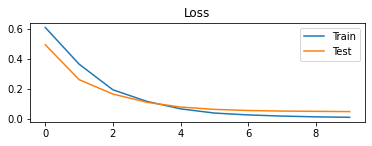

In [77]:
# plot losses based on the model 2 with dropout layer
plt.subplot(211)
plt.title('Loss')
plt.plot(history_2_drop.history['loss'], label="Train")
plt.plot(history_2_drop.history['val_loss'], label="Test")
plt.legend()

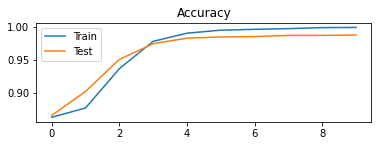

In [78]:
# plot mse
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_2_drop.history['accuracy'], label='Train')
plt.plot(history_2_drop.history['val_accuracy'], label='Test')
plt.legend()
plt.show()

## Prediction & Confusion matrix

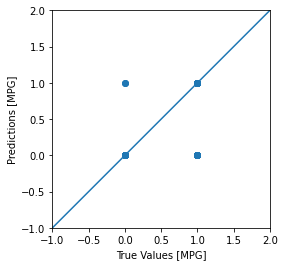

In [79]:
# Make predictions
test_predictions = model_2_drop.predict(x_test).flatten()
test_predictions = (test_predictions > .5).astype(int)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [-1, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f43eca0cf50>)

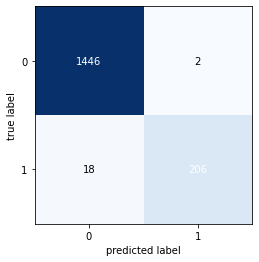

In [80]:
conf_matrix = tf.math.confusion_matrix(labels=y_test,
                                       predictions=test_predictions)
conf_matrix

mat = confusion_matrix(y_test, test_predictions)
plot_confusion_matrix(conf_mat=mat)

## RNN

In [82]:
# Padding
from keras.preprocessing.sequence import pad_sequences
max_len=50000
x_train = pad_sequences(x_train,maxlen=max_len)
x_test = pad_sequences(x_test,maxlen=max_len)

In [86]:
import tensorflow as tf
from keras.layers import Dense,LSTM, Embedding, Dropout, Activation, Bidirectional

In [87]:
max_feature = 50000 #number of unique words to consider
#size of the output vector from each layer
embedding_vector_length = 32

In [88]:
def model_rnn():
  #Creating a sequential model
  model_rnn = tf.keras.Sequential()
  #Creating an embedding layer to vectorize
  model_rnn.add(Embedding(max_feature, embedding_vector_length, input_length=max_len))
  #Adding Bi-directional LSTM
  model_rnn.add(Bidirectional(tf.keras.layers.LSTM(8)))
  #Relu allows converging quickly and allows backpropagation
  model_rnn.add(Dense(2, activation='relu'))
  #Deep Learninng models can be overfit easily, to avoid this, we add randomization using drop out
  model_rnn.add(Dropout(0.1))
  #Adding sigmoid activation function to normalize the output
  model_rnn.add(Dense(1, activation='sigmoid'))

  return model_rnn

In [89]:
model_rnn = model_rnn()

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_rnn.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50000, 32)         1600000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16)                2624      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 34        
_________________________________________________________________
dropout_3 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3         
Total params: 1,602,661
Trainable params: 1,602,661
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
history_rnn = model_rnn.fit(
    x_train, y_train, 
    batch_size=100, 
    epochs=1, # reduced epochs due to time limit 
    validation_data=(x_test, y_test))

y_predict_rnn = [1 if o>0.5 else 0 for o in model_rnn.predict(x_test)]

39/39 [==============================] - 334s 9s/step - loss: 0.6863 - accuracy: 0.8659 - val_loss: 0.6792 - val_accuracy: 0.8660


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f43ea47c9d0>)

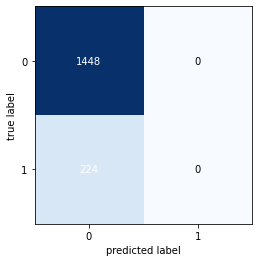

In [92]:
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_rnn)
conf_matrix

mat = confusion_matrix(y_test, y_predict_rnn)
plot_confusion_matrix(conf_mat=mat)